In [31]:
import pandas as pd
import numpy as np 

In [45]:
data = pd.read_csv('../artifacts/BA_reviews.csv')
data.head()

,id,reviews
0,0,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
1,1,Not Verified | I flew from Malaga via LHR to...
2,2,✅ Trip Verified | Milan to Miami return via L...
3,3,✅ Trip Verified | BA created a new low-cost s...
4,4,✅ Trip Verified | I flew with British Airway...


In [46]:
data['verified'] = data['reviews'].str.split('|').str[0]
data['reviews'] = data['reviews'].str.split('|').str[1]
data['verified'][1]

'Not Verified '

In [47]:
def mark(x):
    if x == 'Not Verified ':
        return 0
    else:
        return 1

data['verified'] = data['verified'].map(mark)
data.to_csv('../artifacts/normalized_data.csv')


In [350]:
data = pd.read_csv('../artifacts/normalized_data.csv')

In [351]:
data 

,Unnamed: 0,id,reviews,verified
0,0,0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",1
1,1,1,I flew from Malaga via LHR to Boston on the...,0
2,2,2,Milan to Miami return via London. Worst busi...,1
3,3,3,BA created a new low-cost subsidiary in BA E...,1
4,4,4,I flew with British Airways from Heathrow t...,1
...,...,...,...,...
995,995,995,"London City to Zurich, I fly this route a lo...",1
996,996,996,I booked a flight from Bucharest to London a...,1
997,997,997,"London to Calgary. Thank you to James, a Clu...",1
998,998,998,"Vancouver to London, we were upgraded to bus...",1


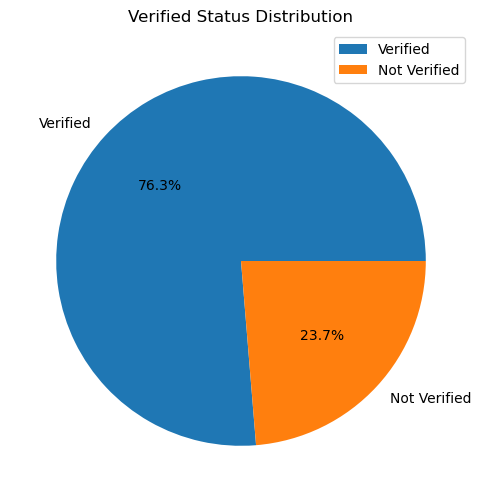

In [352]:
import matplotlib.pyplot as plt 
import seaborn as sns

verified_distribution = data['verified'].value_counts().reset_index(name='count')

plt.figure(figsize=(8, 6))
plt.pie(verified_distribution['count'], labels=["Verified","Not Verified"], autopct='%1.1f%%',frame=False)

plt.title('Verified Status Distribution')

plt.legend()

# Show the plot
plt.show()


In [353]:
import re
def clean_text(text):
    text = re.sub(r"[^a-zA-Z0-9\s.,!?']", '', text)
    text = text.lower()  
    return text

data['reviews'] = data['reviews'].apply(clean_text)

In [354]:
from wordcloud import  wordcloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    word_tokens = word_tokenize(text)
    filtered_words = [word for word in word_tokens if word.lower() not in stop_words and word.isalpha()]
    text  = ' '.join(filtered_words)
    return text
    print(text)

clean_text('dcwc dvc vwc inasc')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anshujoshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anshujoshi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anshujoshi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


'dcwc dvc vwc inasc'

In [355]:
data['reviews'] = data['reviews'].apply(clean_text)

In [356]:
data

,Unnamed: 0,id,reviews,verified
0,0,0,lhr sfo las lgw august club world shame britis...,1
1,1,1,flew malaga via lhr boston may arrival boston ...,0
2,2,2,milan miami return via london worst business c...,1
3,3,3,ba created new lowcost subsidiary ba euroflyer...,1
4,4,4,flew british airways heathrow hannover althoug...,1
...,...,...,...,...
995,995,995,london city zurich fly route lot around times ...,1
996,996,996,booked flight bucharest london return airport ...,1
997,997,997,london calgary thank james club world flight a...,1
998,998,998,vancouver london upgraded business class airpo...,1


In [357]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_score(text):
    cmp_score = analyzer.polarity_scores(text)['compound']
    return cmp_score

get_score('hello im good')

0.4404

In [358]:
data['sentiment'] = data['reviews'].map(get_score)
data

,Unnamed: 0,id,reviews,verified,sentiment
0,0,0,lhr sfo las lgw august club world shame britis...,1,0.9118
1,1,1,flew malaga via lhr boston may arrival boston ...,0,-0.4939
2,2,2,milan miami return via london worst business c...,1,-0.9148
3,3,3,ba created new lowcost subsidiary ba euroflyer...,1,0.9899
4,4,4,flew british airways heathrow hannover althoug...,1,-0.7579
...,...,...,...,...,...
995,995,995,london city zurich fly route lot around times ...,1,0.6908
996,996,996,booked flight bucharest london return airport ...,1,-0.6971
997,997,997,london calgary thank james club world flight a...,1,0.8718
998,998,998,vancouver london upgraded business class airpo...,1,0.9239


In [359]:
import nltk
from nltk.tokenize import sent_tokenize

def analyze_text(text):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Initialize variables to store analysis results
    flight_experience = ""
    issues_encountered = []
    customer_service = ""
    overall_assessment = ""
    resolution = ""

    # Define keywords for each category
    categories_keywords = {
        "flight_experience": ["flight experience", "airline experience", "boarding", "cabin crew"],
        "issues_encountered": ["issues", "problems", "difficulties", "seat", "IFE", "in-flight entertainment", "delay", "weather","luggage"],
        "customer_service": ["customer service", "service quality", "response", "acknowledgement", "refund", "compensation"],
        "overall_assessment": ["overall assessment", "overall experience", "satisfaction", "quality", "disappointment"],
        "resolution": ["resolution", "response", "acknowledgment", "contact", "attempt", "refund", "compensation"]
    }

    # Iterate over sentences to identify categories
    for sentence in sentences:
        for category, keywords in categories_keywords.items():
            for keyword in keywords:
                if keyword in sentence.lower():
                    if category == "flight_experience":
                        flight_experience += sentence.strip() + ". "
                    elif category == "issues_encountered":
                        issues_encountered.append(sentence.strip())
                    elif category == "customer_service":
                        customer_service += sentence.strip() + ". "
                    elif category == "overall_assessment":
                        overall_assessment += sentence.strip() + ". "
                    elif category == "resolution":
                        resolution += sentence.strip() + ". "

    return  flight_experience,issues_encountered,customer_service,overall_assessment,resolution


In [360]:
all_reviews = ' '.join(data['reviews'])
flight_experience,issues_encountered,customer_service,overall_assessment,resolution = analyze_text(all_reviews)

In [364]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
import gensim
aspects = {
    "Flight Experience": flight_experience,
    "Issues Encountered": issues_encountered,
    "Customer Service": customer_service,
    "Overall Assessment": overall_assessment,
    "Resolution": resolution
}

for aspect, text_list in aspects.items():
    if text_list:
        print(f"Topics identified for {aspect}:")
        processed_text =text_list
        
        # Create a dictionary representation of the text
        dictionary = corpora.Dictionary(processed_text)
        
        # Create a bag-of-words corpus
        corpus = [dictionary.doc2bow(tokens) for tokens in processed_text]
        
        # Apply LDA model
        lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
        
        # Print the topics
        for idx, topic in lda_model.print_topics(-1):
            print(f"Topic {idx + 1}: {topic}")
    else:
        print(f"No text available for {aspect}")

Topics identified for Flight Experience:


TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [365]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
import gensim

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Tokenize text into words
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    return lemmatized_tokens

# Function to analyze text and extract aspects
def analyze_text(text):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Initialize variables to store analysis results
    flight_experience = []
    issues_encountered = []
    customer_service = []
    overall_assessment = []
    resolution = []

    # Define keywords for each category
    categories_keywords = {
        "flight_experience": ["flight experience", "airline experience", "boarding", "cabin crew"],
        "issues_encountered": ["issues", "problems", "difficulties", "seat", "IFE", "in-flight entertainment", "delay", "weather"],
        "customer_service": ["customer service", "service quality", "response", "acknowledgement", "refund", "compensation"],
        "overall_assessment": ["overall assessment", "overall experience", "satisfaction", "quality", "disappointment"],
        "resolution": ["resolution", "response", "acknowledgment", "contact", "attempt", "refund", "compensation"]
    }

    # Iterate over sentences to identify categories
    for sentence in sentences:
        for category, keywords in categories_keywords.items():
            for keyword in keywords:
                if keyword in sentence.lower():
                    if category == "flight_experience":
                        flight_experience.append(sentence.strip())
                    elif category == "issues_encountered":
                        issues_encountered.append(sentence.strip())
                    elif category == "customer_service":
                        customer_service.append(sentence.strip())
                    elif category == "overall_assessment":
                        overall_assessment.append(sentence.strip())
                    elif category == "resolution":
                        resolution.append(sentence.strip())

    return flight_experience, issues_encountered, customer_service, overall_assessment, resolution

# Example data (assuming 'data' is a dictionary containing 'reviews' as key)
all_reviews = ' '.join(data['reviews'])

# Analyze the combined reviews
flight_experience, issues_encountered, customer_service, overall_assessment, resolution = analyze_text(all_reviews)

# Perform further analysis (e.g., topic modeling) on each aspect
# For simplicity, let's just print the topics identified using LDA for each aspect
aspects = {
    "Flight Experience": flight_experience,
    "Issues Encountered": issues_encountered,
    "Customer Service": customer_service,
    "Overall Assessment": overall_assessment,
    "Resolution": resolution
}

for aspect, text_list in aspects.items():
    if text_list:
        print(f"Topics identified for {aspect}:")
        # Preprocess the text
        processed_texts = [preprocess_text(text) for text in text_list]
        
        # Create a dictionary representation of the text
        dictionary = corpora.Dictionary(processed_texts)
        
        # Create a bag-of-words corpus
        corpus = [dictionary.doc2bow(tokens) for tokens in processed_texts]
        
        # Apply LDA model
        lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
        
        # Print the topics
        for idx, topic in lda_model.print_topics(-1):
            print(f"Topic {idx + 1}: {topic}")
    else:
        print(f"No text available for {aspect}")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anshujoshi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anshujoshi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anshujoshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topics identified for Flight Experience:
Topic 1: 0.029*"flight" + 0.017*"ba" + 0.011*"seat" + 0.010*"service" + 0.008*"time" + 0.008*"hour" + 0.007*"london" + 0.006*"crew" + 0.006*"airline" + 0.006*"class"
Topic 2: 0.017*"flight" + 0.008*"ba" + 0.007*"seat" + 0.007*"service" + 0.005*"hour" + 0.005*"time" + 0.004*"food" + 0.004*"cabin" + 0.004*"london" + 0.004*"airway"
Topic 3: 0.007*"flight" + 0.004*"ba" + 0.003*"seat" + 0.003*"service" + 0.002*"time" + 0.002*"hour" + 0.002*"staff" + 0.002*"food" + 0.002*"cabin" + 0.002*"u"
Topics identified for Issues Encountered:
Topic 1: 0.032*"flight" + 0.016*"ba" + 0.012*"seat" + 0.010*"time" + 0.008*"hour" + 0.007*"london" + 0.007*"service" + 0.006*"british" + 0.006*"one" + 0.006*"airline"
Topic 2: 0.025*"flight" + 0.017*"ba" + 0.013*"service" + 0.010*"seat" + 0.008*"hour" + 0.007*"class" + 0.007*"crew" + 0.006*"business" + 0.006*"time" + 0.006*"london"
Topic 3: 0.002*"flight" + 0.001*"ba" + 0.001*"service" + 0.001*"seat" + 0.001*"time" + 0.001*

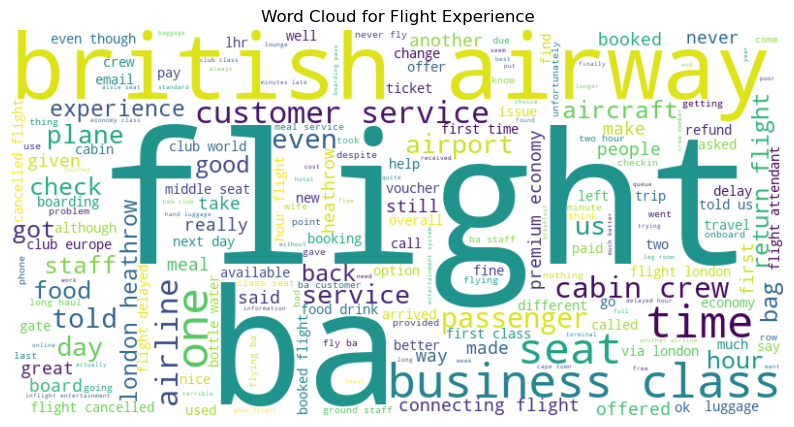

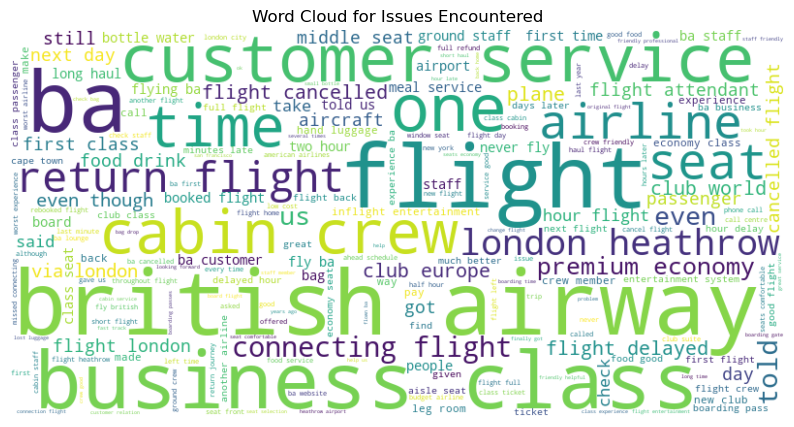

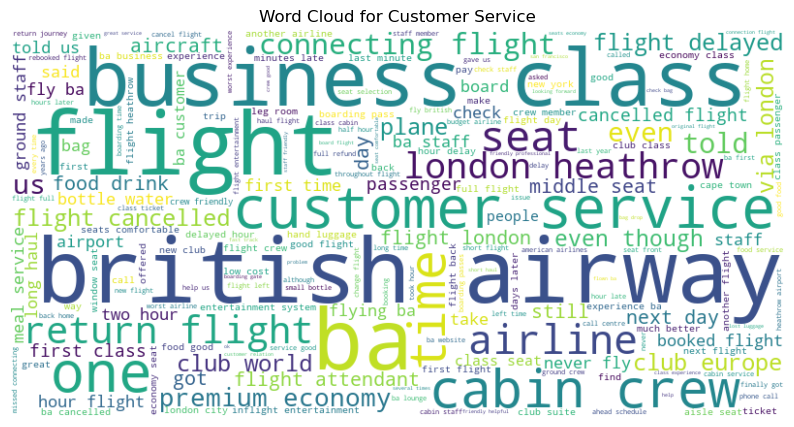

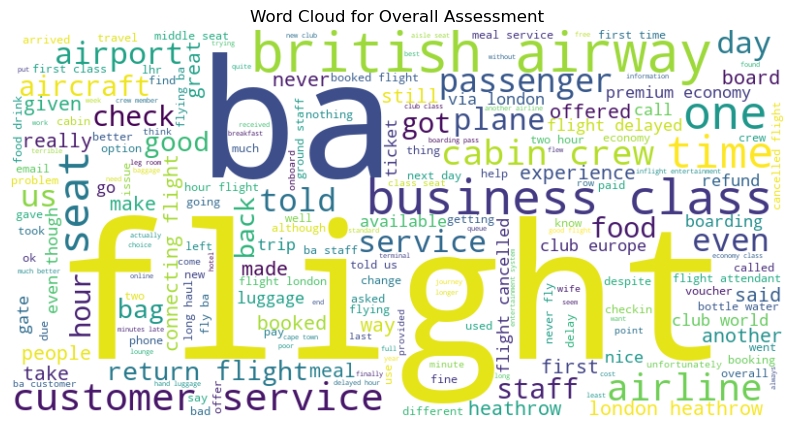

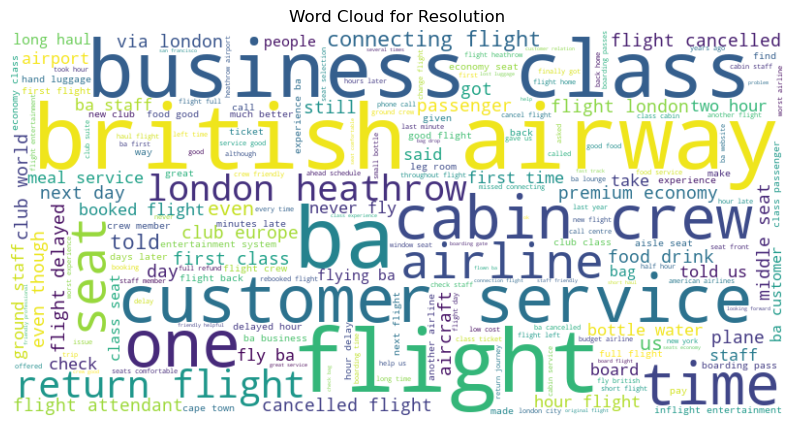

In [367]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for each aspect
def generate_word_clouds(topics, aspect_name):
    # Combine all texts for the aspect into a single string
    all_text = ' '.join(topics)

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {aspect_name}")
    plt.axis('off')
    plt.show()

# Generate word cloud for each aspect
for aspect_name, aspect_texts in aspects.items():
    if aspect_texts:
        generate_word_clouds(aspect_texts, aspect_name)
    else:
        print(f"No text available for {aspect_name}")


In [372]:

data['sentiment_type'] = data['sentiment'].apply(
    lambda score: 'positive' if score > 0.2 else ('negative' if score < -.2 else 'neutral')
    )
data


,Unnamed: 0,id,reviews,verified,sentiment,sentiment_type
0,0,0,lhr sfo las lgw august club world shame britis...,1,0.9118,positive
1,1,1,flew malaga via lhr boston may arrival boston ...,0,-0.4939,negative
2,2,2,milan miami return via london worst business c...,1,-0.9148,negative
3,3,3,ba created new lowcost subsidiary ba euroflyer...,1,0.9899,positive
4,4,4,flew british airways heathrow hannover althoug...,1,-0.7579,negative
...,...,...,...,...,...,...
995,995,995,london city zurich fly route lot around times ...,1,0.6908,positive
996,996,996,booked flight bucharest london return airport ...,1,-0.6971,negative
997,997,997,london calgary thank james club world flight a...,1,0.8718,positive
998,998,998,vancouver london upgraded business class airpo...,1,0.9239,positive


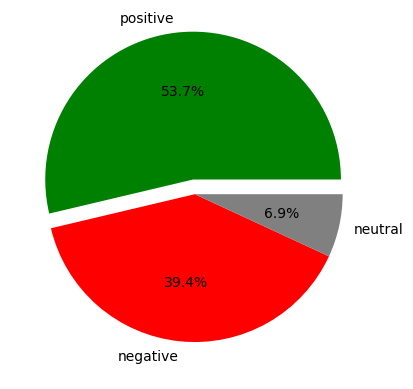

In [373]:

sentiment_type_percentages = data['sentiment_type'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index,
    colors=['green', 'red', 'grey'],
    explode=[0.1, 0, 0],
    autopct='%1.1f%%'
)

plt.show()


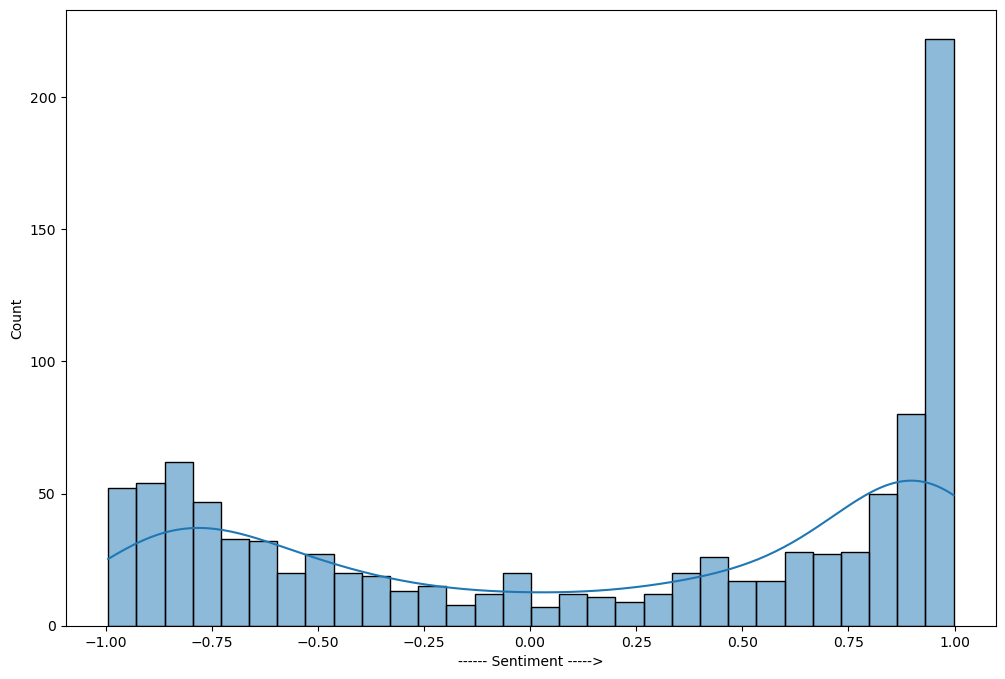

In [385]:
plt.figure(figsize=(12,8))
import numpy 
sns.histplot(data['sentiment'],bins=30,kde=True)
plt.xlabel('------ Sentiment ----->')
plt.show()


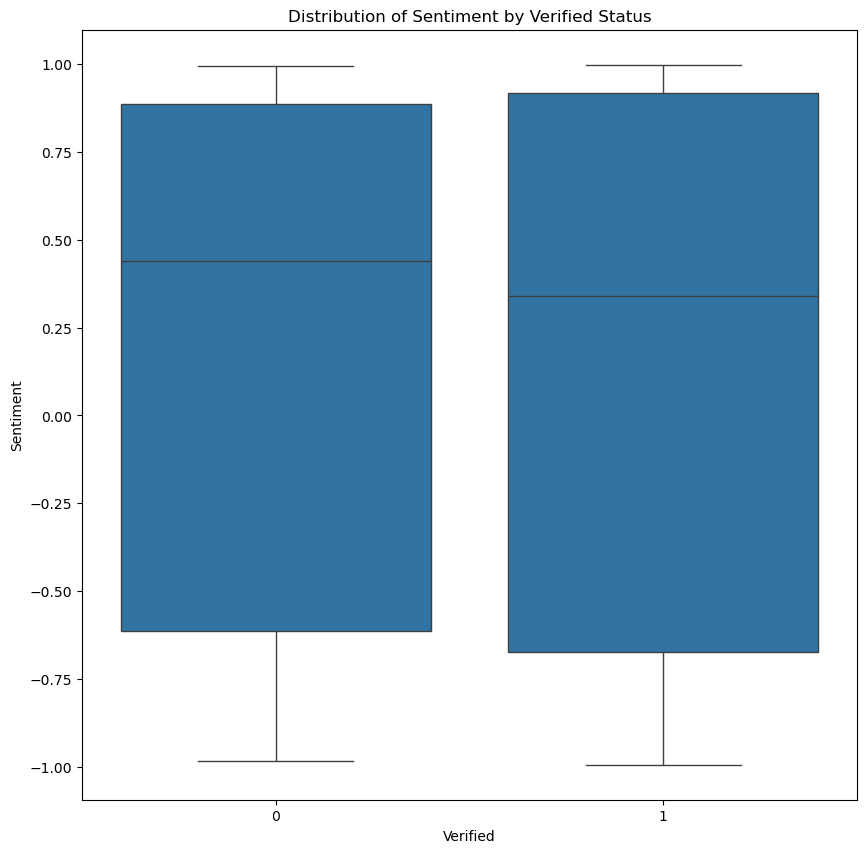

In [393]:
import matplotlib.pyplot as plt
import seaborn as sns

distribution_by_verified = data.groupby('verified')['sentiment']

# Create a box plot
plt.figure(figsize=(10,10))
sns.boxplot(x='verified', y='sentiment', data=data,legend=["Verified","Not Verified"])
plt.title('Distribution of Sentiment by Verified Status')
plt.xlabel('Verified')
plt.ylabel('Sentiment')
plt.show()


<Axes: xlabel='sentiment_type', ylabel='count'>

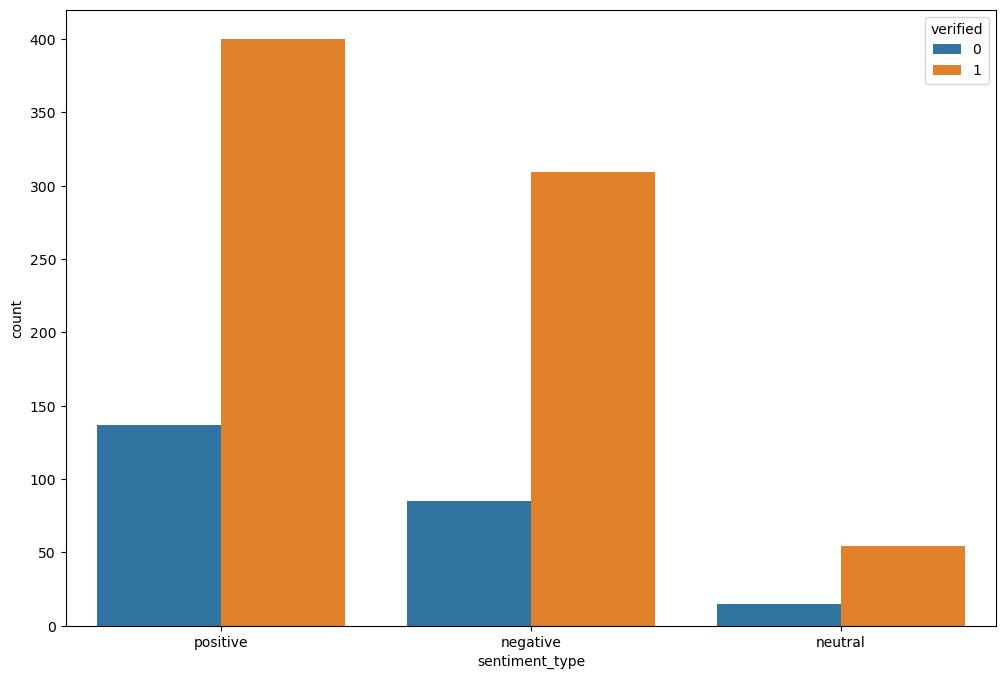

In [391]:
distribution_by_verified_counts = data.groupby('verified')['sentiment_type'].value_counts().reset_index(name = 'count')

plt.figure(figsize=(12,8))
sns.barplot(y='count',x='sentiment_type',hue='verified',data=distribution_by_verified_counts)
